In [106]:
import pandas as pd
import networkx as nx

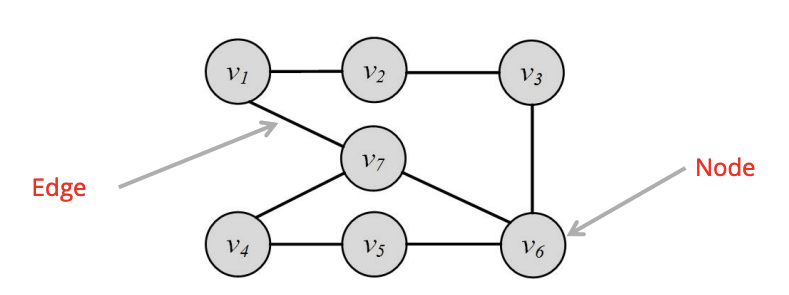

In [ ]:
# directed graph
# undirected graph

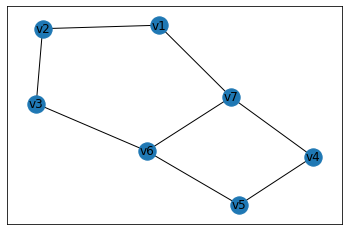

In [113]:
G=nx.Graph()
G.add_edge('v1','v2')
G.add_edge('v2','v3')
G.add_edges_from([('v6','v7'),('v3','v6'),('v5','v6'),
                  ('v4','v5'),('v4','v7'),('v1','v7')])

nx.draw_networkx(G)

In [115]:
G.number_of_nodes()

7

In [116]:
G.number_of_edges()

8

In [123]:
G.nodes()

NodeView(('v1', 'v2', 'v3', 'v6', 'v7', 'v5', 'v4'))

In [124]:
G.edges()

EdgeView([('v1', 'v2'), ('v1', 'v7'), ('v2', 'v3'), ('v3', 'v6'), ('v6', 'v7'), ('v6', 'v5'), ('v7', 'v4'), ('v5', 'v4')])

In [130]:
list(nx.neighbors(G,'v1'))

['v2', 'v7']

### Directed Graph

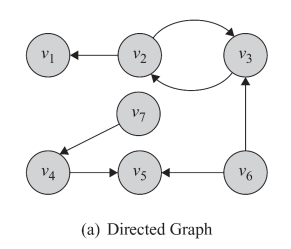

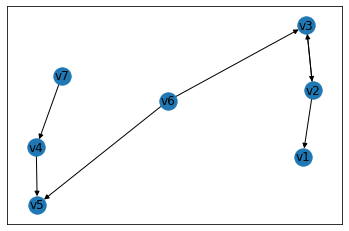

In [122]:

data=[('v2','v1'),('v2','v3'),('v3','v2'),
     ('v7','v4'),('v4','v5'),('v6','v5'),('v6','v3')]

DG=nx.DiGraph()
DG.add_edges_from(data)

nx.draw_networkx(DG)

In [131]:
DG.nodes()

NodeView(('v2', 'v1', 'v3', 'v7', 'v4', 'v5', 'v6'))

In [132]:
DG.edges()

OutEdgeView([('v2', 'v1'), ('v2', 'v3'), ('v3', 'v2'), ('v7', 'v4'), ('v4', 'v5'), ('v6', 'v5'), ('v6', 'v3')])

In [136]:
[nb for nb in nx.neighbors(DG,'v6')]

['v5', 'v3']

In [138]:
# only direct edge of node to be considered as NB
[nb for nb in nx.neighbors(DG,'v3')]

['v2']

In [150]:
# v3 deg. = 3 (in v2, out v2, in v6)
DG.degree()

DiDegreeView({'v2': 3, 'v1': 1, 'v3': 3, 'v7': 1, 'v4': 2, 'v5': 2, 'v6': 2})

In [151]:
sum([deg for deg in dict(DG.degree()).values()])

14

### Theory of Degree and Edges 

$\sum_{i} d_i = 2|E|$

In [157]:
print("number of edges: {}".format(len(list(G.edges()))))
print("number of degree: {}".format(sum(dict(G.degree()).values())))

number of edges: 8
number of degree: 16


number of edges: 89
number of degree: 178


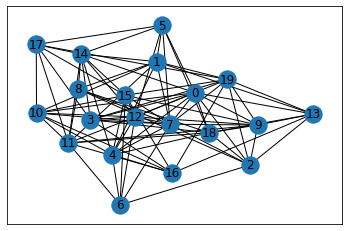

In [178]:
GRandom=nx.gnp_random_graph(20,0.4)
print("number of edges: {}".format(len(list(GRandom.edges()))))
print("number of degree: {}".format(sum(dict(GRandom.degree()).values())))
nx.draw_networkx(GRandom)

### Lemma1: the number of nodes with odd degree is even

In [180]:
len([d for d in dict(GRandom.degree).values() if d%2 == 1])

10

### Lemma2: In any directed graph, the summation of in-degrees is equal to the summation of out-degrees

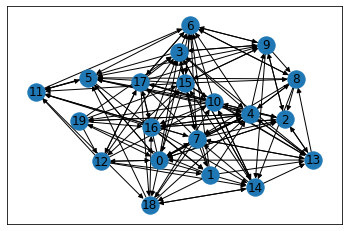

In [183]:
GDRandom=nx.gnp_random_graph(20,0.4,directed=True)
nx.draw_networkx(GDRandom)

In [187]:
GDRandom.in_degree,GDRandom.out_degree

(InDegreeView({0: 8, 1: 4, 2: 7, 3: 9, 4: 11, 5: 9, 6: 10, 7: 8, 8: 5, 9: 6, 10: 6, 11: 6, 12: 4, 13: 7, 14: 8, 15: 7, 16: 6, 17: 5, 18: 6, 19: 3}),
 OutDegreeView({0: 8, 1: 6, 2: 6, 3: 7, 4: 8, 5: 4, 6: 6, 7: 9, 8: 6, 9: 7, 10: 8, 11: 4, 12: 7, 13: 6, 14: 6, 15: 11, 16: 7, 17: 8, 18: 5, 19: 6}))

In [192]:
print("sum of in-degree: {}".format(sum(dict(GDRandom.in_degree).values())))
print("sum of out-degree: {}".format(sum(dict(GDRandom.out_degree).values())))

sum of in-degree: 135
sum of out-degree: 135


# Degree Distribution

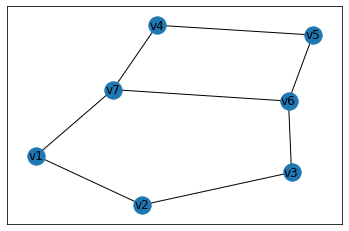

In [195]:
nx.draw_networkx(G)

In [197]:
# each node has ordered degree as 
# we aim to see plot-distribution
dict(G.degree()).values() 

dict_values([2, 2, 2, 3, 3, 2, 2])

(array([5., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 10 artists>)

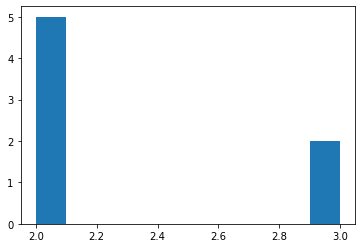

In [198]:
import matplotlib.pyplot as plt
plt.hist(dict(G.degree()).values())

(array([4., 0., 3., 0., 6., 1., 0., 1., 2., 3.]),
 array([11. , 11.7, 12.4, 13.1, 13.8, 14.5, 15.2, 15.9, 16.6, 17.3, 18. ]),
 <BarContainer object of 10 artists>)

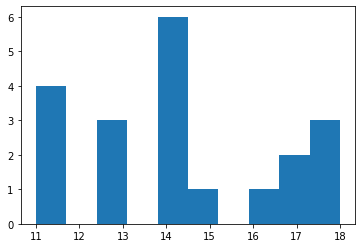

In [199]:
plt.hist(dict(GRandom.degree()).values())

# Building Network

In [30]:
df=pd.read_csv('friends.csv')
df.columns=['source','target']
df

,source,target
0,bobby,tony
1,bobby,tom
2,bobby,bebe
3,tony,tom
4,tony,robert
5,tony,jack
6,bebe,vilma


In [5]:
file=open('friends.csv')
for line in file:
    print(line, end='')
file.close()

col1,col2
bobby,tony
bobby,tom
bobby,bebe
tony,tom
tony,robert
tony,jack
bebe,vilma

In [20]:
lines=open('friends.csv').readlines()
lines

['col1,col2\n',
 'bobby,tony\n',
 'bobby,tom\n',
 'bobby,bebe\n',
 'tony,tom\n',
 'tony,robert\n',
 'tony,jack\n',
 'bebe,vilma']

In [18]:
data=[tuple(line.strip().split(',')) for line in lines][1:]

In [19]:
data

[('bobby', 'tony'),
 ('bobby', 'tom'),
 ('bobby', 'bebe'),
 ('tony', 'tom'),
 ('tony', 'robert'),
 ('tony', 'jack'),
 ('bebe', 'vilma')]

## Intro to NetworkX

In [33]:
tuple(zip(df.source,df.target))

(('bobby', 'tony'),
 ('bobby', 'tom'),
 ('bobby', 'bebe'),
 ('tony', 'tom'),
 ('tony', 'robert'),
 ('tony', 'jack'),
 ('bebe', 'vilma'))

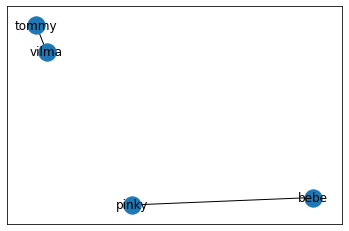

In [51]:
G = nx.Graph()
G.add_edge('vilma','tommy')
G.add_edge('bebe','pinky')
nx.draw_networkx(G)

In [52]:
for ele in data:
    G.add_edge(ele[0],ele[1])

In [53]:
G.nodes()

NodeView(('vilma', 'tommy', 'bebe', 'pinky', 'bobby', 'tony', 'tom', 'robert', 'jack'))

In [54]:
G.degree()

DegreeView({'vilma': 2, 'tommy': 1, 'bebe': 3, 'pinky': 1, 'bobby': 3, 'tony': 4, 'tom': 2, 'robert': 1, 'jack': 1})

In [55]:
G.edges()

EdgeView([('vilma', 'tommy'), ('vilma', 'bebe'), ('bebe', 'pinky'), ('bebe', 'bobby'), ('bobby', 'tony'), ('bobby', 'tom'), ('tony', 'tom'), ('tony', 'robert'), ('tony', 'jack')])

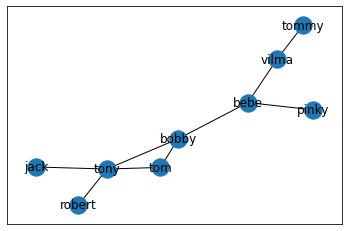

In [56]:
nx.draw_networkx(G)

In [61]:
# all degrees 
# sum degree should be even number
sum([v for v in dict(G.degree()).values()])

18

In [62]:
!ls

1st_graph_friend_list.gephi     chromedriver_mac64_m1.zip
Facebook Friends Selenium.ipynb friend_list.csv
Intro to NetworkX.ipynb         friends.csv
chromedriver                    sna.ipynb


In [66]:
# fl=pd.read_csv('friend_list.csv',encoding='utf-8')

In [69]:
lines=open('friend_list.csv',encoding='utf-8',errors='replace').readlines()

In [70]:
edges=[line.strip().split(',') for line in lines]

In [72]:
len(edges)

7864

In [95]:
fl=pd.read_csv('friend_list.csv',header=None,encoding='utf-8',error_bad_lines=False, sep='\t')

In [83]:
G = nx.Graph()
for ele in edges:
    G.add_edge(ele[0],ele[1])

In [98]:
# G.nodes()

In [88]:
# G.degree()

In [97]:
# G.edges()

In [105]:
print([val for (node, val) in G.degree()])

[208, 1, 1, 3, 1, 2, 1, 1, 1, 230, 345, 1, 1, 1, 1, 1, 1, 191, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 29, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 124, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 111, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 304, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 9, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [89]:
sum([v for v in dict(G.degree()).values()])

5486

In [101]:
# numbr of nodes in G
G.number_of_nodes()

2673

In [102]:
# numbr of edges in G
G.number_of_edges()

2743